In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

**Merge 12 sheets vào 1 sheet**

In [ ]:
path='/content/Sales2019/'
frames=[]
all_lengths=[]

for file in os.listdir(path):
    filepath=os.path.join(path,file)
    if filepath.endswith(".csv"):
        df1 = pd.read_csv(filepath)
        frames.append(df1)
        length_1month = len(df1.index)
        all_lengths.append(length_1month)

df = pd.concat(frames, ignore_index=True)

# Lưu DataFrame mới thành tệp CSV mới có tên 'annualSales2019.csv'
df.to_csv("annualSales2019.csv", index=False)

In [ ]:
path1='/content/annualSales2019.csv'
df=pd.read_csv(path1)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016"
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001"
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016"
186848,278795,iPhone,1,700,10/31/19 17:21,"291 Hill St, Seattle, WA 98101"


Kiểm tra đủ cột hàng chưa?

In [ ]:
print(all_lengths)
print(sum(all_lengths))

[11686, 15226, 18383, 12036, 13622, 17661, 14371, 16635, 25117, 9723, 12011, 20379]
186850


Kiểm tra giá trị NAN

In [ ]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [ ]:
columns_name = ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']

# Tìm các hàng có giá trị null trong các cột được chọn
null_values = df[columns_name].isnull()
rows_with_null = df[null_values.any(axis=1)]

# In ra các hàng chứa giá trị null
print(rows_with_null)

       Order ID Product Quantity Ordered Price Each Order Date  \
198         NaN     NaN              NaN        NaN        NaN   
574         NaN     NaN              NaN        NaN        NaN   
776         NaN     NaN              NaN        NaN        NaN   
1383        NaN     NaN              NaN        NaN        NaN   
1436        NaN     NaN              NaN        NaN        NaN   
...         ...     ...              ...        ...        ...   
184390      NaN     NaN              NaN        NaN        NaN   
184779      NaN     NaN              NaN        NaN        NaN   
185239      NaN     NaN              NaN        NaN        NaN   
185614      NaN     NaN              NaN        NaN        NaN   
185993      NaN     NaN              NaN        NaN        NaN   

       Purchase Address  
198                 NaN  
574                 NaN  
776                 NaN  
1383                NaN  
1436                NaN  
...                 ...  
184390              NaN  

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

Vì khi gộp dữ liệu sẽ bị dính tiêu đề của từng sheet nên sẽ thực hiện kiểm tra và xóa chúng

In [ ]:
#Kiem tra gia tri trong cot Order ID
df.loc[df['Order ID']=='Order ID']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1679,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3732,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3790,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4323,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
5579,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
184502,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184542,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185088,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185359,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [ ]:
#Xoa nhung hang tieu de trung lap
df.drop(df[df['Order ID'] == 'Order ID'].index, inplace=True)

Data type đang ở dạng object đổi sang các kiểu phù hợp

In [ ]:
df['Order ID']=pd.to_numeric(df['Order ID'])
df['Price Each']=pd.to_numeric(df['Price Each'])
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'])
df['Order Date']=pd.to_datetime(df['Order Date'])

In [ ]:
df.dtypes

Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.to_csv("Sales2019.csv", index=False)

Tách Order Date thành các cột 1 cột tháng

In [ ]:
df['Order Date']

0        2019-09-17 14:44:00
1        2019-09-29 10:19:00
2        2019-09-16 17:48:00
3        2019-09-27 07:52:00
4        2019-09-01 19:03:00
                 ...        
186845   2019-10-12 04:32:00
186846   2019-10-28 22:00:00
186847   2019-10-09 20:58:00
186848   2019-10-31 17:21:00
186849   2019-10-13 11:20:00
Name: Order Date, Length: 185950, dtype: datetime64[ns]

In [ ]:
#Tao cột Month
df['Month']=df['Order Date'].dt.month

In [ ]:
df['Hours']=df['Order Date'].dt.hour

**Tạo cột doanh thu**

In [ ]:
#Tao Doanh thu theo don mua
df['Revenue']=df['Quantity Ordered']* df['Price Each']

In [ ]:
#Sắp xếp thứ tự cột
df = df[['Order ID', 'Product','Quantity Ordered','Price Each','Revenue','Order Date','Hours', 'Month','Purchase Address']]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Revenue,Order Date,Hours,Month,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,15.36,2019-09-17 14:44:00,14,9,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,23.90,2019-09-29 10:19:00,10,9,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,11.95,2019-09-16 17:48:00,17,9,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,149.99,2019-09-27 07:52:00,7,9,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,11.95,2019-09-01 19:03:00,19,9,"125 5th St, Atlanta, GA 30301"


**THỐNG KÊ**

In [ ]:
#Tóm tắt dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Revenue           185950 non-null  float64       
 5   Order Date        185950 non-null  datetime64[ns]
 6   Month             185950 non-null  int64         
 7   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 12.8+ MB


In [ ]:
df.describe()
#Quantity Ordered	có mean: 1.12 và std: 0.44 --> hầu hết đơn hàng đều có số lượng 1
#Price Each có mean: giá bán trung bình là 184.39 max: nhưng có giá bán cao nhất đến 1700

,Order ID,Quantity Ordered,Price Each,Revenue,Month
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,185.490917,7.059140
std,51512.737110,0.442793,332.731330,332.919771,3.502996
min,141234.000000,1.000000,2.990000,2.990000,1.000000
25%,185831.250000,1.000000,11.950000,11.950000,4.000000
50%,230367.500000,1.000000,14.950000,14.950000,7.000000
75%,275035.750000,1.000000,150.000000,150.000000,10.000000
max,319670.000000,9.000000,1700.000000,3400.000000,12.000000


Tổng doanh thu năm 2019

In [ ]:
df['Revenue'].sum()

34492035.97

Tổng doanh thu các tháng

In [ ]:
sales_value=df.groupby("Month").sum()['Revenue']
sales_value.max()

4613443.34

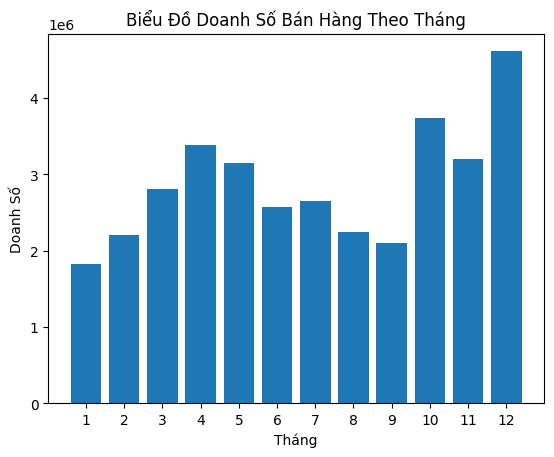

In [ ]:
months=range(1,13)
plt.bar(x=months, height=sales_value)
plt.xticks(months) #show odd months
plt.title('Biểu Đồ Doanh Số Bán Hàng Theo Tháng')
plt.xlabel('Tháng')
plt.ylabel('Doanh Số')
plt.show()

Sản phẩm nào có số lượng bán cao nhất và sản phẩm nào có lượng bán thấp nhất?

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #Tắt cảnh báo


result=df.groupby('Product').sum()['Quantity Ordered']
sort_result=result.sort_values(ascending=False)
sort_result

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

In [ ]:
all_products=df.groupby('Product').sum()['Quantity Ordered']
all_products.max()

31017

In [ ]:
price=df.groupby('Product').mean()['Price Each']
print(price)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


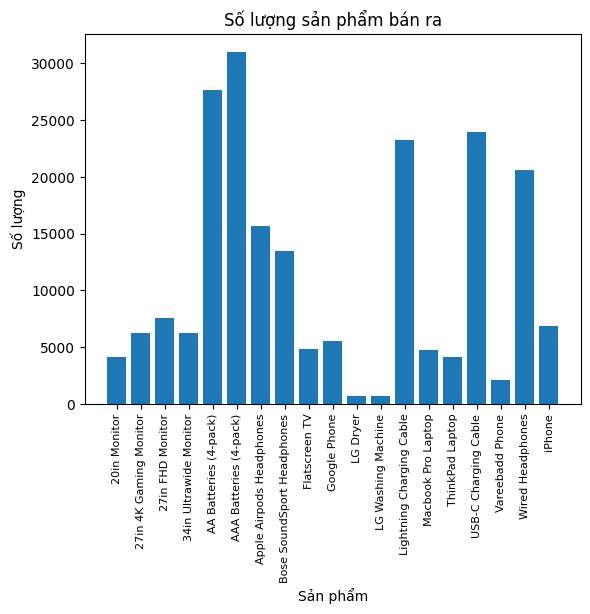

In [ ]:
product_ls=[product for product, quant in all_products.items()]
plt.bar(x=product_ls, height=all_products)
plt.title('Số lượng sản phẩm bán ra')
plt.xticks(product_ls, rotation = 90, size=8)
plt.xlabel("Sản phẩm")
plt.ylabel("Số lượng")
plt.show()

Thành phố có doanh thu cao nhất

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Revenue,Order Date,Month,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,15.36,2019-09-17 14:44:00,9,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,23.90,2019-09-29 10:19:00,9,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,11.95,2019-09-16 17:48:00,9,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,149.99,2019-09-27 07:52:00,9,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,11.95,2019-09-01 19:03:00,9,"125 5th St, Atlanta, GA 30301"


In [ ]:
#Tách sang một cột thành phố
def address_to_city(address ):
  return address.split(',')[1]
df['City']=df['Purchase Address'].apply(address_to_city)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Revenue,Order Date,Hours,Month,Purchase Address,City
0,248151,AA Batteries (4-pack),4,3.84,15.36,2019-09-17 14:44:00,14,9,"380 North St, Los Angeles, CA 90001",Los Angeles
1,248152,USB-C Charging Cable,2,11.95,23.90,2019-09-29 10:19:00,10,9,"511 8th St, Austin, TX 73301",Austin
2,248153,USB-C Charging Cable,1,11.95,11.95,2019-09-16 17:48:00,17,9,"151 Johnson St, Los Angeles, CA 90001",Los Angeles
3,248154,27in FHD Monitor,1,149.99,149.99,2019-09-27 07:52:00,7,9,"355 Hickory St, Seattle, WA 98101",Seattle
4,248155,USB-C Charging Cable,1,11.95,11.95,2019-09-01 19:03:00,19,9,"125 5th St, Atlanta, GA 30301",Atlanta


In [ ]:
City_sales=df.groupby('City')['Revenue'].sum()
sort =City_sales.sort_values(ascending=False)
print(sort)

City
 San Francisco    8262203.91
 Los Angeles      5452570.80
 New York City    4664317.43
 Boston           3661642.01
 Atlanta          2795498.58
 Dallas           2767975.40
 Seattle          2747755.48
 Portland         2320490.61
 Austin           1819581.75
Name: Revenue, dtype: float64


In [ ]:
sales_city=df.groupby("City").sum()['Revenue']
sales_city.max()

8262203.91

In [ ]:
cities= []
for city, revenue in sales_city.items():
  cities.append(city)
print(cities)

[' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles', ' New York City', ' Portland', ' San Francisco', ' Seattle']


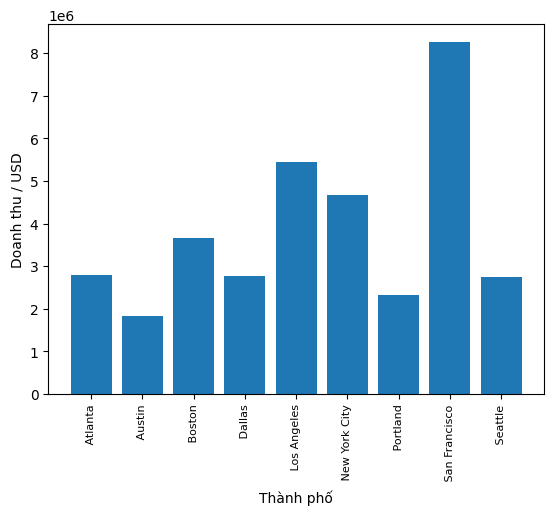

In [ ]:
plt.bar(x=cities, height=sales_city)
plt.xticks(cities, rotation = 90, size=8)
plt.xlabel("Thành phố")
plt.ylabel("Doanh thu / USD")
plt.show()

In [ ]:
sales_hours=df.groupby("Hours").count()['Revenue']
sales_hours.max()


12905

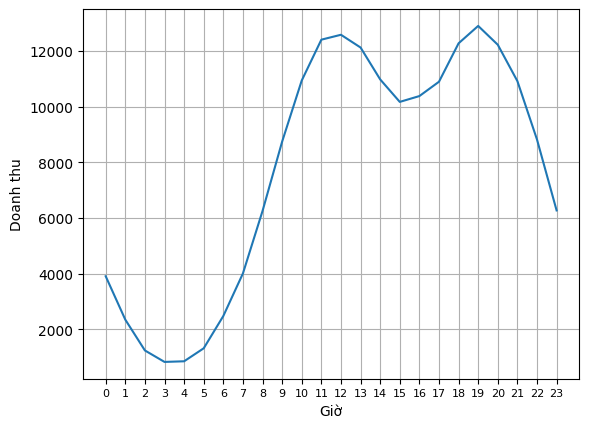

In [ ]:
hours=[hour for hour, sales in sales_hours.items()]

plt.plot(hours, sales_hours)
plt.grid()
plt.xticks(hours, size=8)
plt.xlabel("Giờ")
plt.ylabel("Doanh thu")
plt.show()

In [ ]:
df

,Order ID,Product,Quantity Ordered,Price Each,Revenue,Order Date,Hours,Month,Purchase Address,City
0,248151,AA Batteries (4-pack),4,3.84,15.36,2019-09-17 14:44:00,14,9,"380 North St, Los Angeles, CA 90001",Los Angeles
1,248152,USB-C Charging Cable,2,11.95,23.90,2019-09-29 10:19:00,10,9,"511 8th St, Austin, TX 73301",Austin
2,248153,USB-C Charging Cable,1,11.95,11.95,2019-09-16 17:48:00,17,9,"151 Johnson St, Los Angeles, CA 90001",Los Angeles
3,248154,27in FHD Monitor,1,149.99,149.99,2019-09-27 07:52:00,7,9,"355 Hickory St, Seattle, WA 98101",Seattle
4,248155,USB-C Charging Cable,1,11.95,11.95,2019-09-01 19:03:00,19,9,"125 5th St, Atlanta, GA 30301",Atlanta
...,...,...,...,...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,3.84,2019-10-12 04:32:00,4,10,"920 Adams St, San Francisco, CA 94016",San Francisco
186846,278793,Wired Headphones,1,11.99,11.99,2019-10-28 22:00:00,22,10,"161 Chestnut St, Los Angeles, CA 90001",Los Angeles
186847,278794,AA Batteries (4-pack),1,3.84,3.84,2019-10-09 20:58:00,20,10,"346 Spruce St, San Francisco, CA 94016",San Francisco
186848,278795,iPhone,1,700.00,700.00,2019-10-31 17:21:00,17,10,"291 Hill St, Seattle, WA 98101",Seattle


In [ ]:
df.to_csv('Sales2019_US.csv', index=False)